# Kelompok 6: E-commerce Shipping Data
- Ketua: Refanie FS
- Anggota:
1. Nur Cahyanti
2. Handika
3. Indra Laksana
4. Fajar Nurdiono
5. Utlia Rahma


In [ ]:
!git clone https://github.com/refaniefs/rakamin.git
!pip install --upgrade openpyxl
!pip install --upgrade xlrd

Cloning into 'rakamin'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data path
df = pd.read_csv('rakamin/final-project/shipping.csv')

In [ ]:
# getting 5 samples
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8451,8452,B,Ship,4,3,247,3,low,F,4,4962,1
2783,2784,F,Ship,3,2,98,3,medium,F,60,1057,1
10198,10199,C,Ship,5,5,239,6,low,M,1,1384,0
4892,4893,A,Ship,5,1,246,3,low,F,3,5013,0
1587,1588,B,Ship,2,4,162,3,low,F,34,1558,1


In [ ]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# [1] Descriptive Statistics

In [ ]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [ ]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# categorical columns 
df[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
# Value Counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



## (A) Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
Semua tipe data sudah sesuai.  Nama kolom dan isinya sudah sesuai, kecuali kolom `Warehouse_block` memiliki data A, B, C, D, F dan bukan A, B, C, D, E sesuai keterangan dari Kaggle.

## (B) Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
Tidak ada data yang memiliki nilai kosong

## (C) Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
- Pada data `Prior_purchases` terdapat perbedaan yang cukup besar pada mean dan mediannya. Nilai maksimumnya juga sangat besar, sehingga data ini pasti memiliki outliers.
- Pada data `Discount_offered` juga terdapat perbedaan yang besar antara mean dan mediannya. Begitupun nilai maximum nya sangat besar, sehingga data ini juga sudah pasti memiliki outliers.
- Data `Mode_of_Shipment` memiliki data 'Ship' yang sangat besar dibandingkan dengan data yang lain.
- Sedangkan pada data `Product_importance` memiliki data 'high' yang jauh lebih kecil daripada yang lainnya


# [2] Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

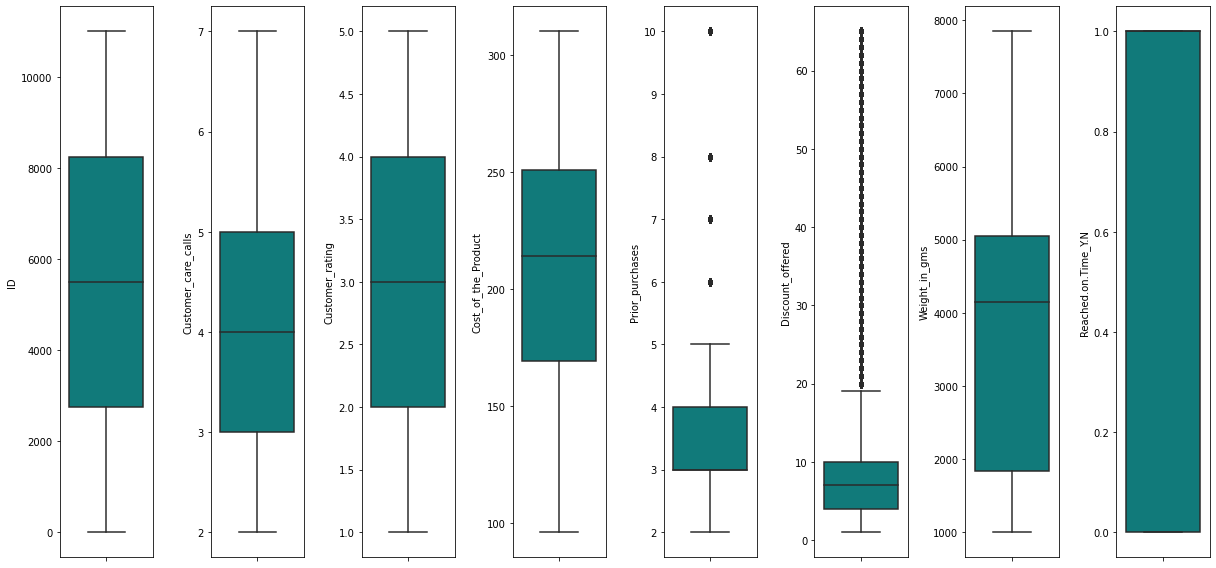

In [ ]:
features = nums
plt.figure(figsize=(17, 8))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='darkcyan', orient='v')
    plt.tight_layout()

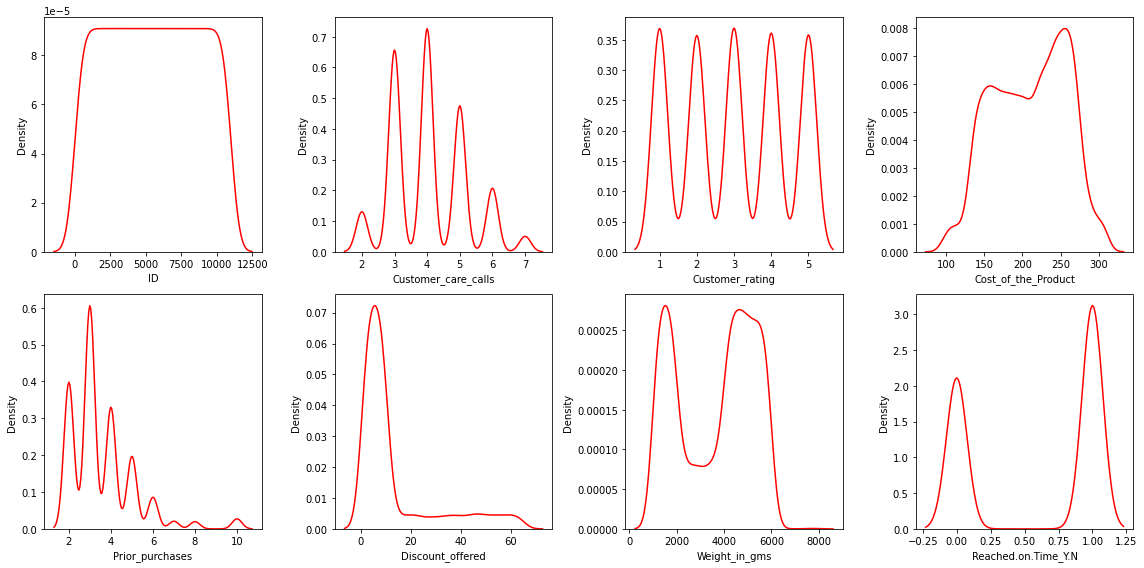

In [ ]:
features = nums
plt.figure(figsize=(16, 8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.kdeplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

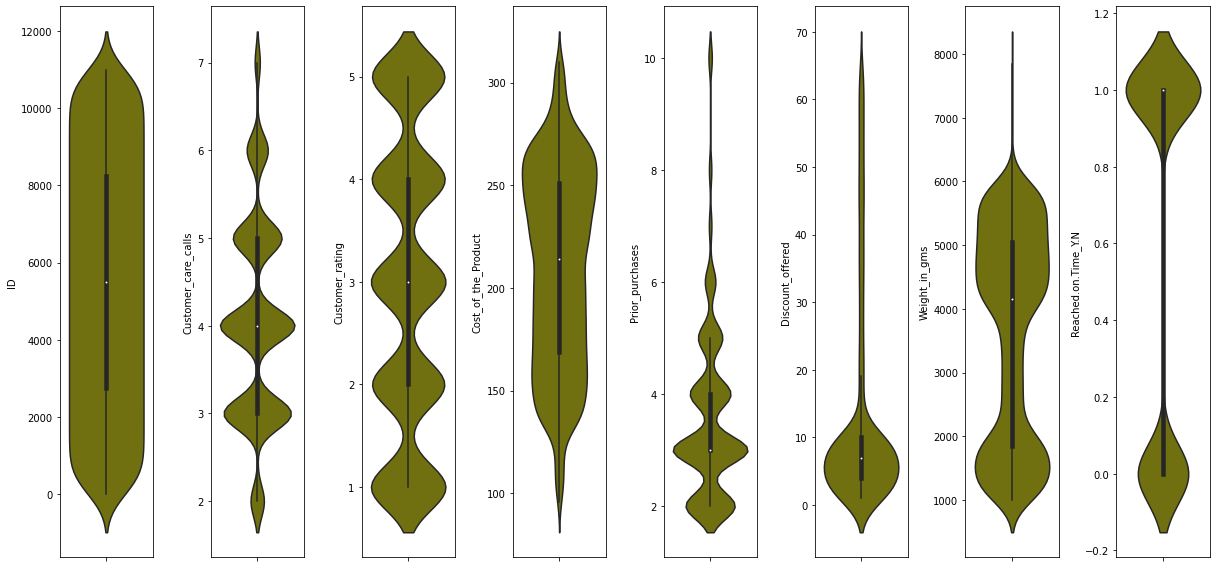

In [ ]:
plt.figure(figsize=(17, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='olive', orient='v')
    plt.tight_layout()

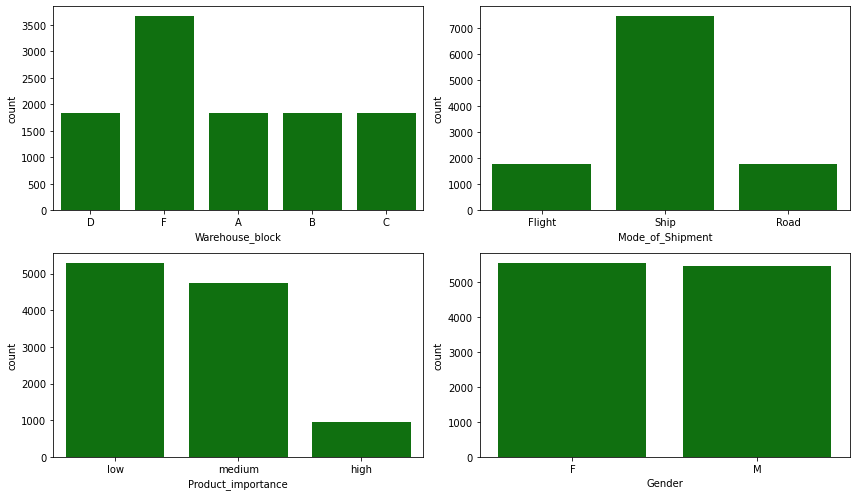

In [ ]:
# categorical data
plt.figure(figsize=(12, 7))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

## Hasil Observasi Univariate Analysis
1. Distribusi data numerik:
- `Customer_care_calls` mendekati normal namun cenderung skew ke kanan.
- `Customer_rating` memiliki jumlah yang mendekati setara untuk setiap nilai rating.
- `Cost_of_the_product` mendekati distribusi normal.
- `Prior_purchases` memiliki distribusi yang skew ke kanan.
- `Discount_offered` terdapat terlalu banyak outlier, distribusi skew ke kanan.
- `Weight_in_gms` memiliki distribusi bimodal dan mean < median.
- `Reached.on.Time_Y.N` memiliki nilai 1 (terlambat) yang lebih banyak dari 0.
2. Distribusi data kategorik:
- "Ship" di `Mode_of_Shipment` terlalu banyak dibandingkan "Flight" dan "Road".
- "F" di `Warehouse_block` terlalu banyak dibandingkan "A", "B", "C", dan "D".
- "High" di `Product_importance` terlalu sedikit dibandingkan "low" dan "medium".
- Distribusi `Gender` cukup seimbang dengan jumlah "F" yang lebih besar dari "M".

## Follow up untuk Data Pre-processing

Ada beberapa kemungkinan yang dapat dilakukan saat Data Pre-processing nanti, di antaranya adalah:

1. Kolom numerik:
- Data skew kanan ditransformasi logaritmik mendekati distribusi normal, lalu dapat dibuang outliernya (0.3% atau 5% terluar)
- Data terlalu banyak outlier dapat dibuang atau dijadikan max value

2. Dapat dikombinasikan:
- Value “high” dengan “medium” di `Product_importance` menjadi "medium-high"
- Value “Flight” dengan “Road” di `Mode_of_Shipment` menjadi "flight-road"

3. Diedit: “F” di Warehouse_block diganti ke “E”
4. Dapat dilakukan Label Encoding: `Product_importance` dan `Gender`
5. Dapat dilakukan One Hot Encoding: `Warehouse_block` dan `Mode_of_Shipment`
6. Dapat dibuang: `ID`

# [3] Multivariate Analysis
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas).

## Feature Numerik

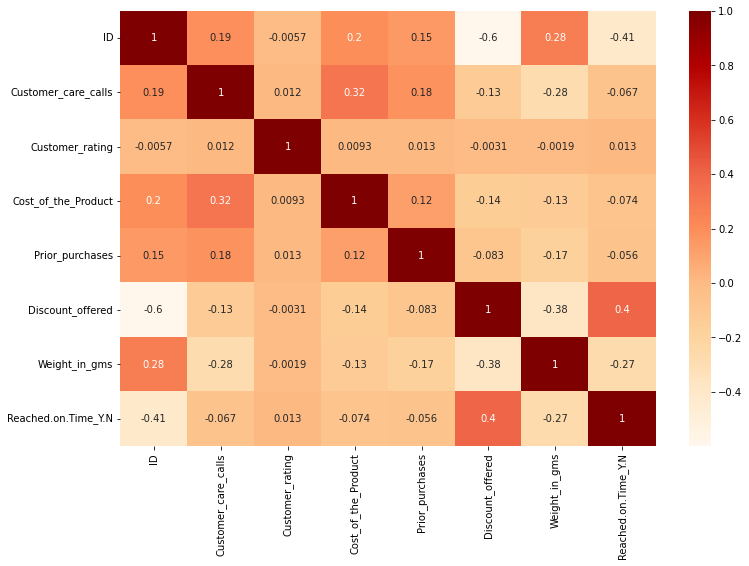

In [ ]:
# correlation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='OrRd', annot=True, fmt='.2g');

<Figure size 1080x1080 with 0 Axes>

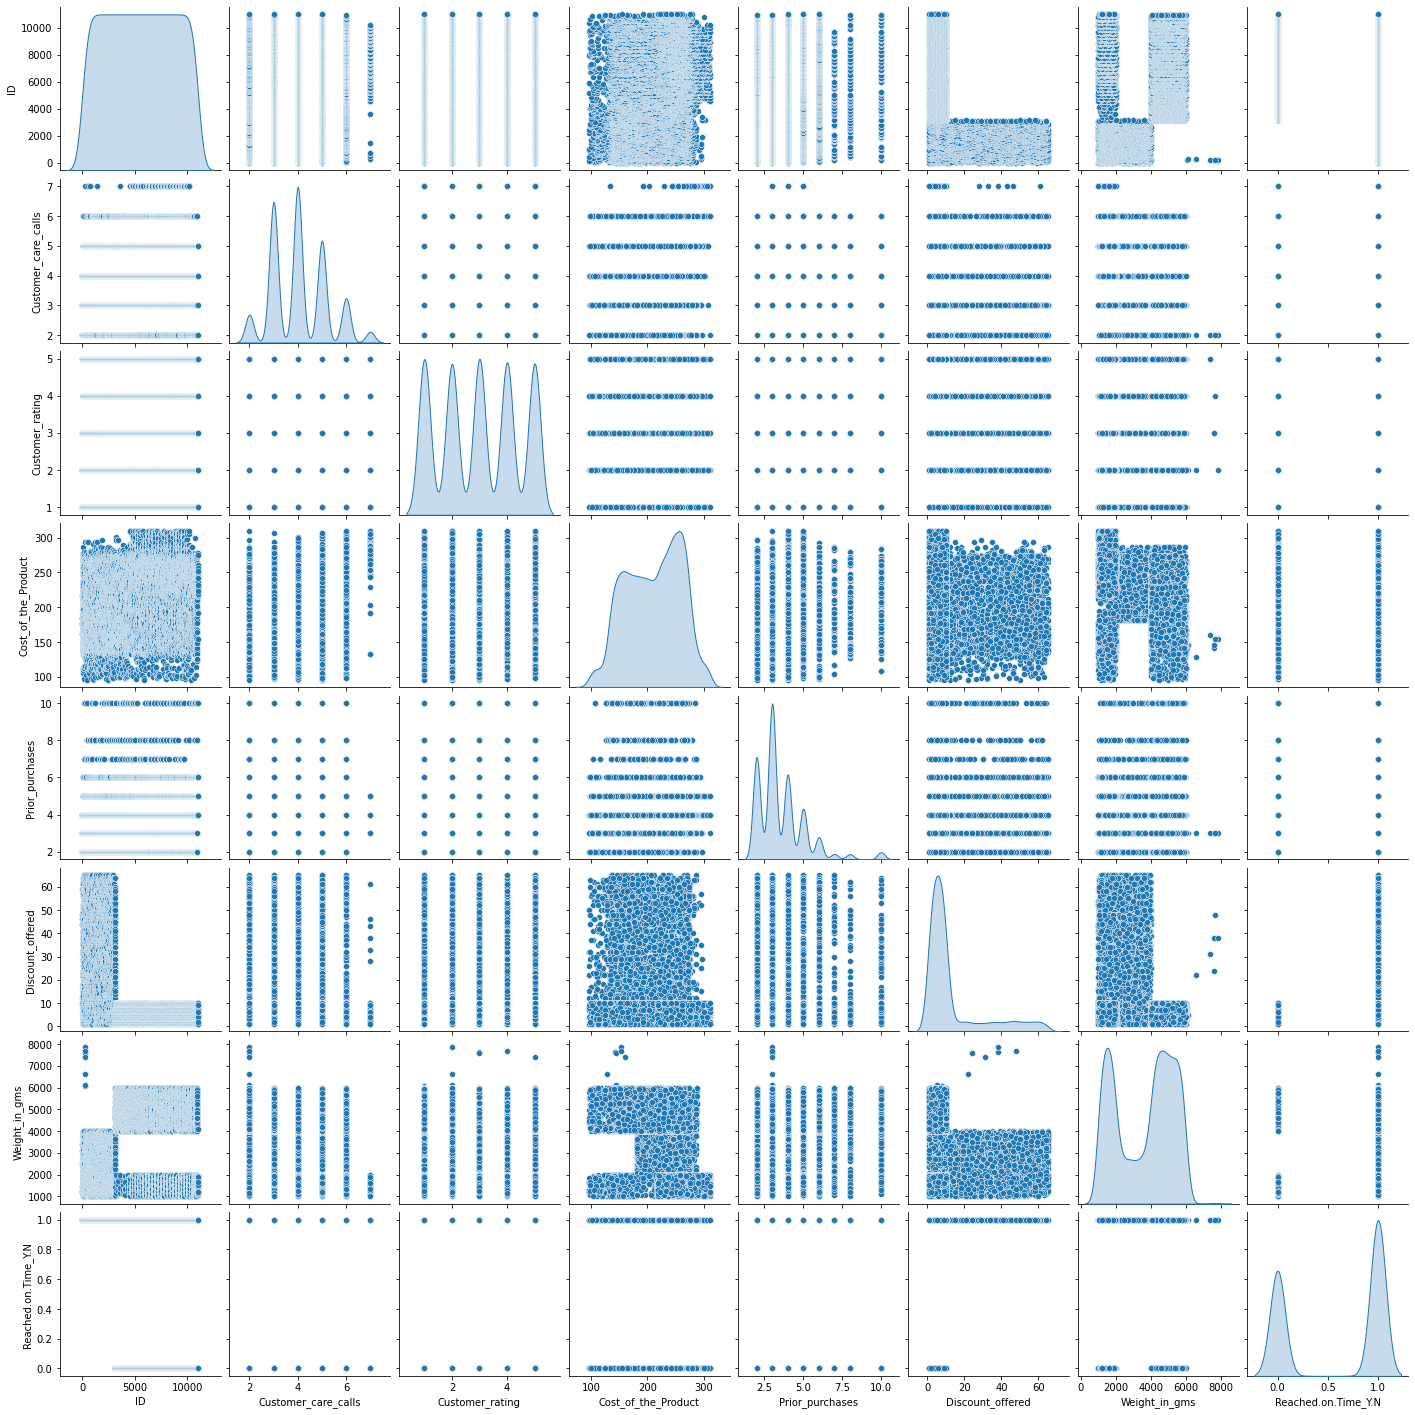

In [ ]:
# correlation pair plots
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show();

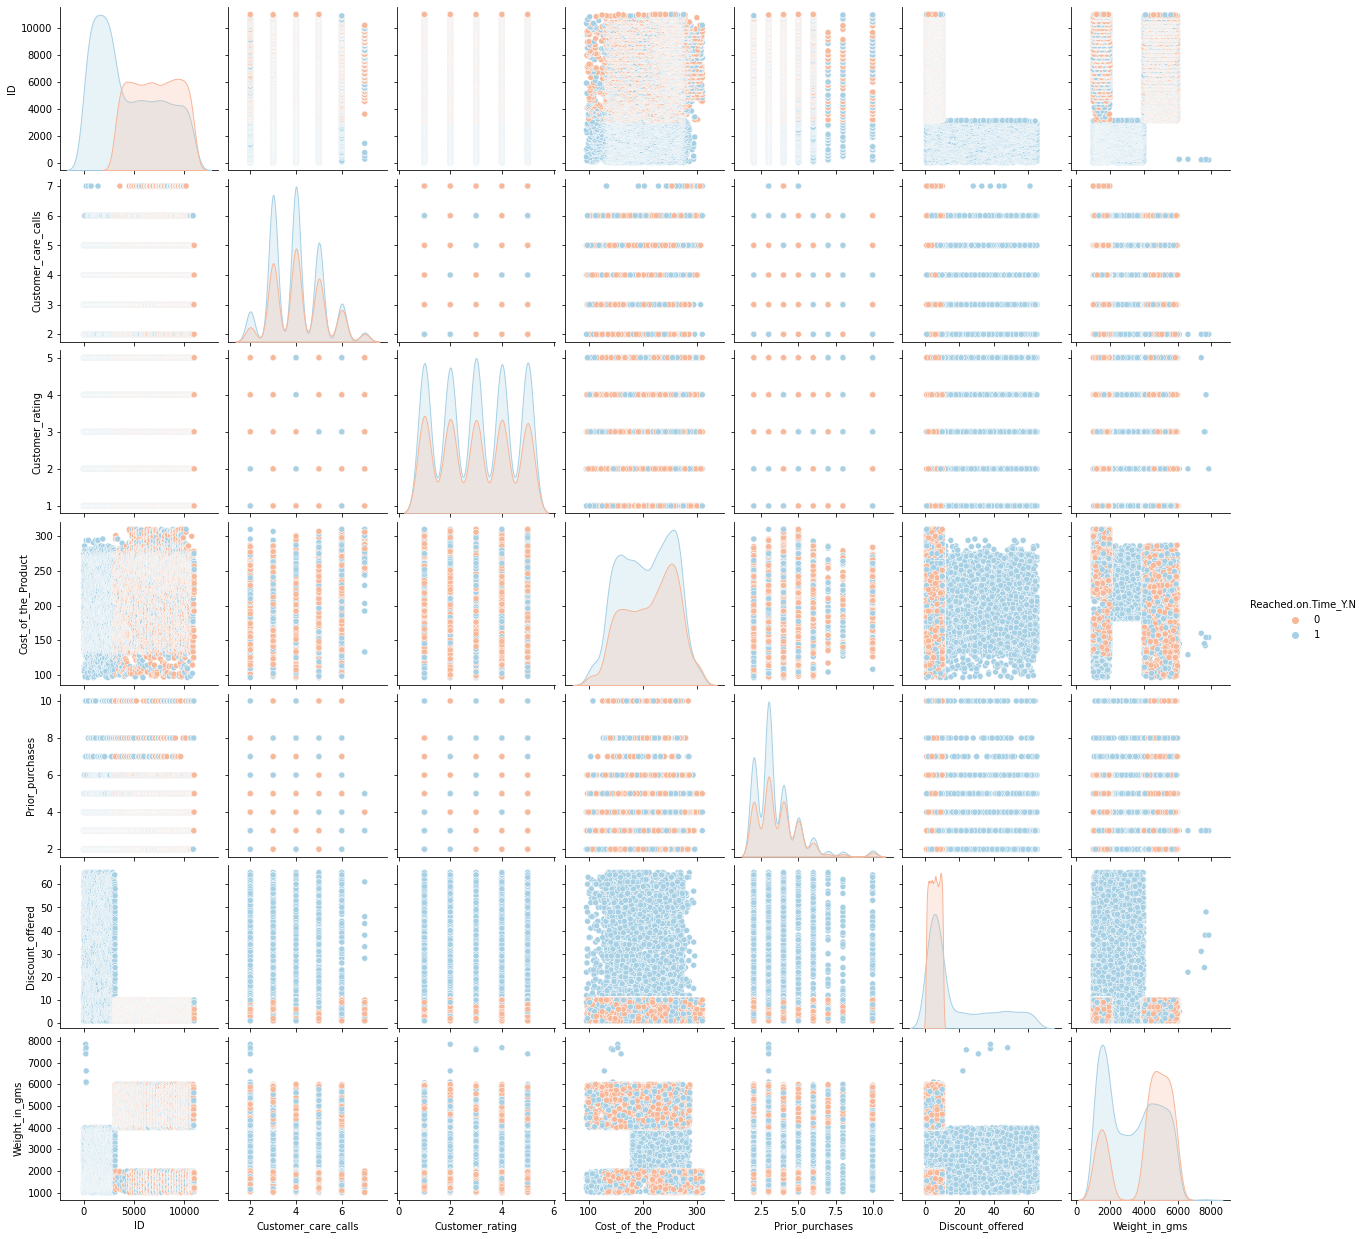

In [ ]:
# correlation pair plots with hue
sns.pairplot(data=df, hue = "Reached.on.Time_Y.N", palette = "RdBu")

## Feature Kategorikal

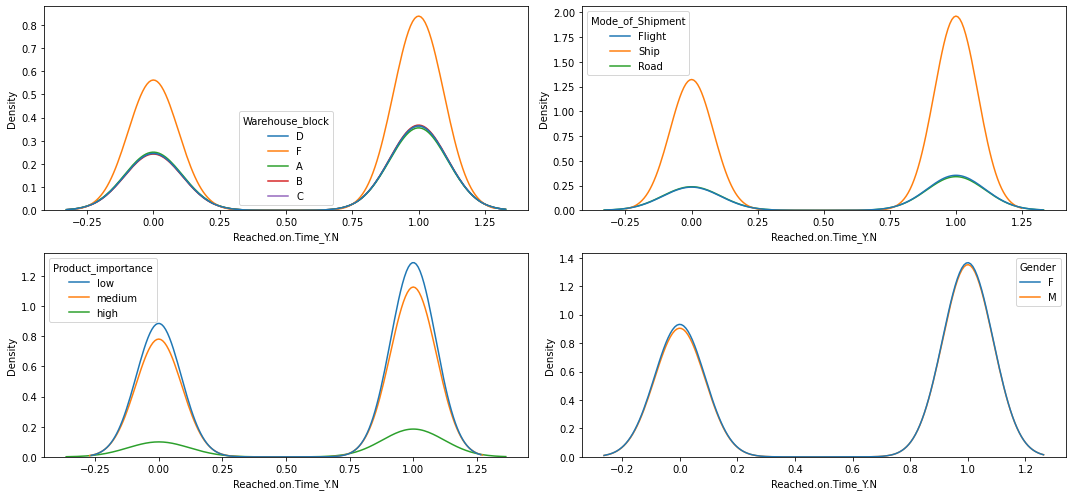

In [ ]:
# category plots
features = cats
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df, x='Reached.on.Time_Y.N', hue=features[i])
    plt.tight_layout()

## (A) Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
Feature `Discount_offered` cukup berkorelasi dengan `Reached.on.Time_Y.N` dengan nilai korelasi 0,4.

Semua feature akan diproses lebih lanjut mengingat dataset ini memiliki hanya sedikit feature.

## (B) Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
Semakin besar `Weight_in_gms` maka `Discount_offered` cenderung semakin kecil.

Semua feature akan diproses lebih lanjut mengingat dataset ini memiliki hanya sedikit feature.

# [4] Business Insights
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.